#Practice 4: Discovering good wines with decision trees, Random forests and Ensembles. 

*What is the favourite holiday for a data scientist? Random forests and a good wine!*

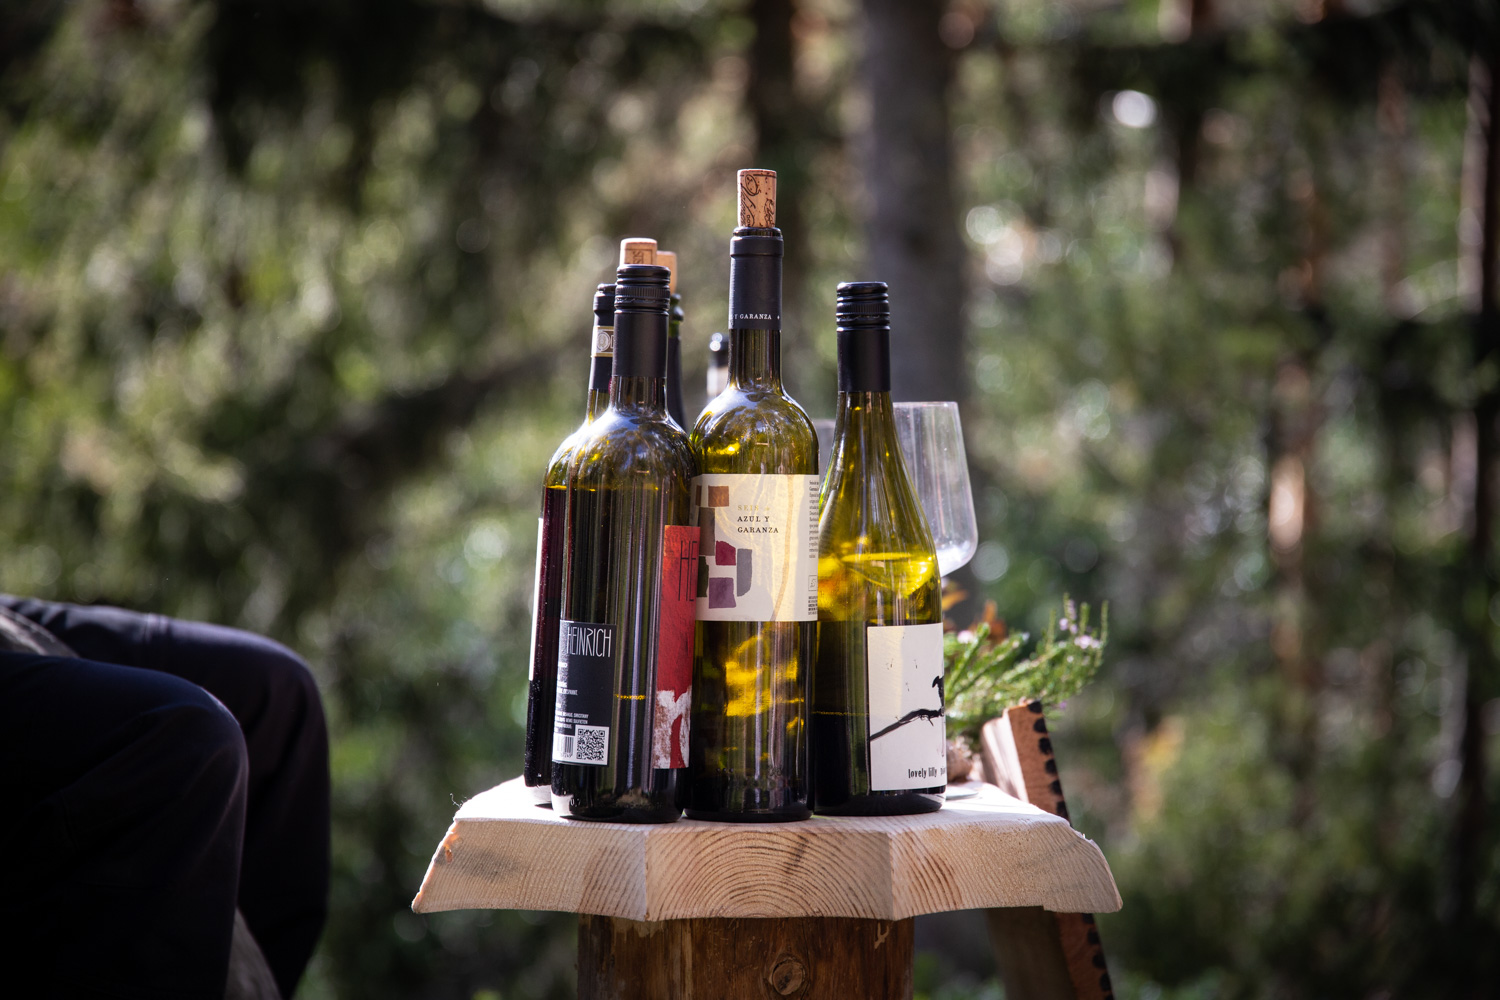

Given a wine dataset where we are going to perform classification of good or bad wines and regression of their particular quality, we are going to explore how do we use decision trees, random forests and ensembles in R.

This is a jupyter notebook, all the variables that you create in each cell can be used in another cell. But watch out!! If you use variables in a cell that are not defined before, you will get an error. Check out that you have first declared the variable.

But, first, let us import some libraries.

In [1]:
##Import libraries. Remember to use install.packages if they are not installed. Comment them if they are already installed.
#install.packages("rpart", dependencies = TRUE)
#install.packages("rpart.plot", dependencies = TRUE)
#install.packages("randomForest", dependencies = TRUE)
#install.packages("caret", dependencies = TRUE)
#install.packages("ipred", dependencies = TRUE)
#install.packages("ggplot2", dependencies = TRUE)
#install.packages("gbm", dependencies = TRUE)

#This code is necessary for the jupyter notebook.
install.packages("rpart")
install.packages("rpart.plot")
install.packages("randomForest")
install.packages("caret")
install.packages("gbm")


library(rpart) #For simple decision trees.
library(rpart.plot) #Fancy way of painting decision trees.
library(randomForest) #For simple random forests.
library(caret) # For support functions and models.
library(ipred) # For ensembles.
library(gbm) # For ensembles.
library(ggplot2) #For exploratory data analysis.

set.seed(42) #Finally let us all share the same seed. Of course, if you understand why I have set it to 42, you will sure know how the universe works :-). 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘future.apply’, ‘lava’, ‘prodlim’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin


Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Loaded gbm 2.1.8



Let us now import the dataset that we are going to work with in this session. We are going to have **two versions** of it. **One** of them for a **classification** task where the label means a bad or good wine. The **other** one for a **regression** task with the quality of the wine. We are also going to make a train and test set split to use them later.

In [2]:
set.seed(42)
path <- 'https://raw.githubusercontent.com/EduardoGarrido90/tesis/master/winequality-red.csv?token=AAECY7TTZD6BTJ2OPYTV7P3BTSX6Y'
dataset <-read.csv(path)

#Classification dataset.
wine_classification <- dataset[,-12]
wine_classification$quality_dic <- ifelse(wine_classification$quality_dic=="0", "Bad", "Good")
wine_classification$quality_dic <- factor(wine_classification$quality_dic)
index_labels <- createDataPartition(wine_classification$quality_dic, p = 0.7, list = F )
##INTRODUCE YOUR CODE HERE TO GENERATE THE TRAIN AND TEST SET FOR CLASSIFICATION
train_classification<-wine_classification[index_labels,]
test_classification<-wine_classification[-index_labels,]


#Regression dataset.
wine_regression <- dataset[,-13]
train_index_reg <- sample(1 : nrow(wine_regression), nrow(wine_regression)*0.7, replace=FALSE)
##INTRODUCE YOUR CODE HERE TO GENERATE THE TRAIN AND TEST SET FOR REGRESSION
train_reg<-wine_regression[train_index_reg,]
test_reg<-wine_regression[-train_index_reg,]



# BASIC CONCEPTS.

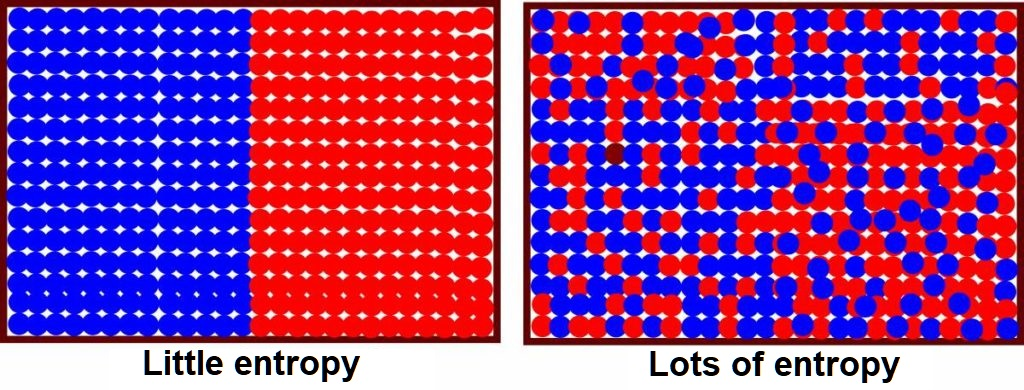

A little bit of exploratory analysis: always good in practice!!! Remember, in real life, 80% is data wrangling, 20% is data modelling. It is also useful for you to practice it, this is your chance! Perform some basic univariate analysis, for example, plot a histogram of your favourite variable as we have done for you. Then, discover the correlations between the variables. You can draw an scatter plot with ggplot2 with the variables that are most correlated with the label, substituting the existing ones. 



fixed.acidity volatile.acidity citric.acid residual.sugar chlorides
1  7.4          0.70             0.00        1.9            0.076    
2  7.8          0.88             0.00        2.6            0.098    
3  7.8          0.76             0.04        2.3            0.092    
4 11.2          0.28             0.56        1.9            0.075    
5  7.4          0.70             0.00        1.9            0.076    
6  7.4          0.66             0.00        1.8            0.075    
  free.sulfur.dioxide total.sulfur.dioxide density pH   sulphates alcohol
1 11                  34                   0.9978  3.51 0.56      9.4    
2 25                  67                   0.9968  3.20 0.68      9.8    
3 15                  54                   0.9970  3.26 0.65      9.8    
4 17                  60                   0.9980  3.16 0.58      9.8    
5 11                  34                   0.9978  3.51 0.56      9.4    
6 13                  40                   0.9978  3.51 0.56      9.4    
  quality quality_dic
1 5       0          
2 5       0          
3 5       0          
4 6       0          
5 5       0          
6 5       0

 fixed.acidity   volatile.acidity  citric.acid    residual.sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

fixed.acidity volatile.acidity citric.acid residual.sugar
fixed.acidity         1.00000000   -0.256130895      0.67170343  0.114776724  
volatile.acidity     -0.25613089    1.000000000     -0.55249568  0.001917882  
citric.acid           0.67170343   -0.552495685      1.00000000  0.143577162  
residual.sugar        0.11477672    0.001917882      0.14357716  1.000000000  
chlorides             0.09370519    0.061297772      0.20382291  0.055609535  
free.sulfur.dioxide  -0.15379419   -0.010503827     -0.06097813  0.187048995  
total.sulfur.dioxide -0.11318144    0.076470005      0.03553302  0.203027882  
density               0.66804729    0.022026232      0.36494718  0.355283371  
pH                   -0.68297819    0.234937294     -0.54190414 -0.085652422  
sulphates             0.18300566   -0.260986685      0.31277004  0.005527121  
alcohol              -0.06166827   -0.202288027      0.10990325  0.042075437  
quality               0.12405165   -0.390557780      0.22637251  0.013731637  
quality_dic           0.12006104   -0.270711532      0.21471559  0.047778946  
                     chlorides    free.sulfur.dioxide total.sulfur.dioxide
fixed.acidity         0.093705186 -0.153794193        -0.11318144         
volatile.acidity      0.061297772 -0.010503827         0.07647000         
citric.acid           0.203822914 -0.060978129         0.03553302         
residual.sugar        0.055609535  0.187048995         0.20302788         
chlorides             1.000000000  0.005562147         0.04740047         
free.sulfur.dioxide   0.005562147  1.000000000         0.66766645         
total.sulfur.dioxide  0.047400468  0.667666450         1.00000000         
density               0.200632327 -0.021945831         0.07126948         
pH                   -0.265026131  0.070377499        -0.06649456         
sulphates             0.371260481  0.051657572         0.04294684         
alcohol              -0.221140545 -0.069408354        -0.20565394         
quality              -0.128906560 -0.050656057        -0.18510029         
quality_dic          -0.097307638 -0.071747296        -0.13951655         
                     density     pH          sulphates    alcohol    
fixed.acidity         0.66804729 -0.68297819  0.183005664 -0.06166827
volatile.acidity      0.02202623  0.23493729 -0.260986685 -0.20228803
citric.acid           0.36494718 -0.54190414  0.312770044  0.10990325
residual.sugar        0.35528337 -0.08565242  0.005527121  0.04207544
chlorides             0.20063233 -0.26502613  0.371260481 -0.22114054
free.sulfur.dioxide  -0.02194583  0.07037750  0.051657572 -0.06940835
total.sulfur.dioxide  0.07126948 -0.06649456  0.042946836 -0.20565394
density               1.00000000 -0.34169933  0.148506412 -0.49617977
pH                   -0.34169933  1.00000000 -0.196647602  0.20563251
sulphates             0.14850641 -0.19664760  1.000000000  0.09359475
alcohol              -0.49617977  0.20563251  0.093594750  1.00000000
quality              -0.17491923 -0.05773139  0.251397079  0.47616632
quality_dic          -0.15045968 -0.05728334  0.199485209  0.40731485
                     quality     quality_dic
fixed.acidity         0.12405165  0.12006104
volatile.acidity     -0.39055778 -0.27071153
citric.acid           0.22637251  0.21471559
residual.sugar        0.01373164  0.04777895
chlorides            -0.12890656 -0.09730764
free.sulfur.dioxide  -0.05065606 -0.07174730
total.sulfur.dioxide -0.18510029 -0.13951655
density              -0.17491923 -0.15045968
pH                   -0.05773139 -0.05728334
sulphates             0.25139708  0.19948521
alcohol               0.47616632  0.40731485
quality               1.00000000  0.71019625
quality_dic           0.71019625  1.00000000

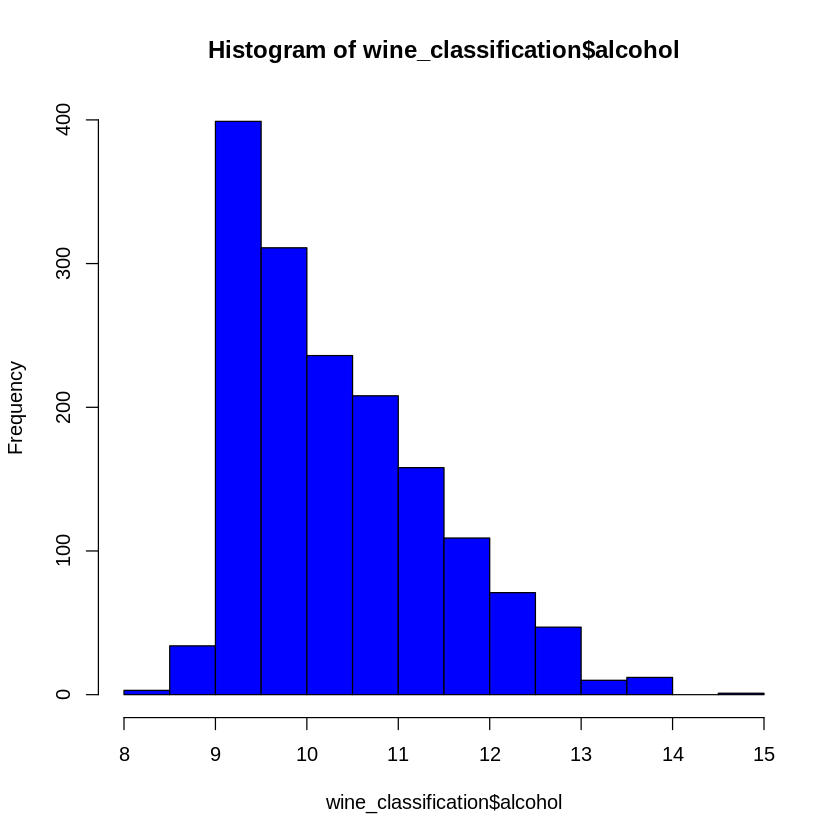

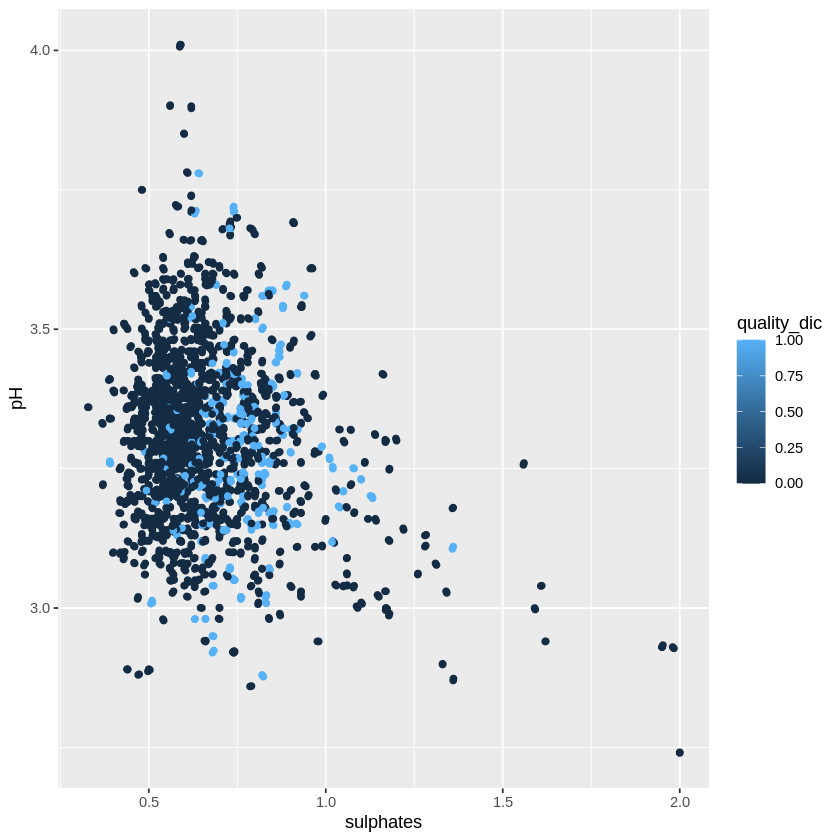

In [14]:
# INTRODUCE CODE HERE. Solution.
head(dataset)
summary(dataset)
hist(wine_classification$alcohol, col="blue")
#PLOT A HISTOGRAM OF ANOTHER VARIABLE HERE. 

# Bivariate descriptive analysis. Correlations.
# CALL THE COR METHOD WITH THE CLASSIFICATION DATASET HERE. 
cor(dataset)

# Bivariate descriptive analysis. Visualizations.
# Most correlated variables with the target.
ax_plot <- ggplot(data=dataset)+
  aes(x=sulphates ,y=pH, col=quality_dic)+ #Modify here the variables and put the most correlated ones with quality_dic
  geom_point()+
  geom_jitter()
ax_plot

Let us first compute the impurity of the whole wine classification dataset. With Gini and entropy criteria over the whole dataset.
Give an interpretation of both the obtained Gini and Entropy criterion.
Remember, logarithms for entropy are of base 2!


In [40]:
gini_criterion <- function(p) {
  return(1-sum(p**2))
      
}

entropy_criterion <- function(p) {
  return(-sum(p*log2(p)))
     
}

bad_wines <- sum(wine_classification$quality_dic=="Bad")#INTRODUCE YOUR CODE HERE
good_wines <- sum(wine_classification$quality_dic=="Good")#INTRODUCE YOUR CODE HERE
total_wines <- nrow(wine_classification) #INTRODUCE YOUR CODE HERE
proportion_bad_wines <- bad_wines / total_wines
proportion_good_wines <- good_wines / total_wines

gini_criterion(c(proportion_bad_wines,proportion_good_wines))
entropy_criterion(c(proportion_bad_wines,proportion_good_wines))


#INTRODUCE YOUR CODE HERE

[1] 0.2345853

[1] 0.572892

In [36]:
1-proportion_good_wines^2-proportion_bad_wines^2

[1] 0.2345853

Do the same for the regression dataset. Impurity is now measured as the residual sum of squares with respect to the mean. Remember the expression of the residual sum of squares and apply it to the mean of the quality to discover the impurity of the dataset.

In [42]:
mean_quality <- mean(wine_regression$quality)
## INTRODUCE YOUR CODE HERE. Solution.
sqrt(sum((mean_quality-wine_regression$quality)^2))

[1] 32.28258

# DECISION TREES.

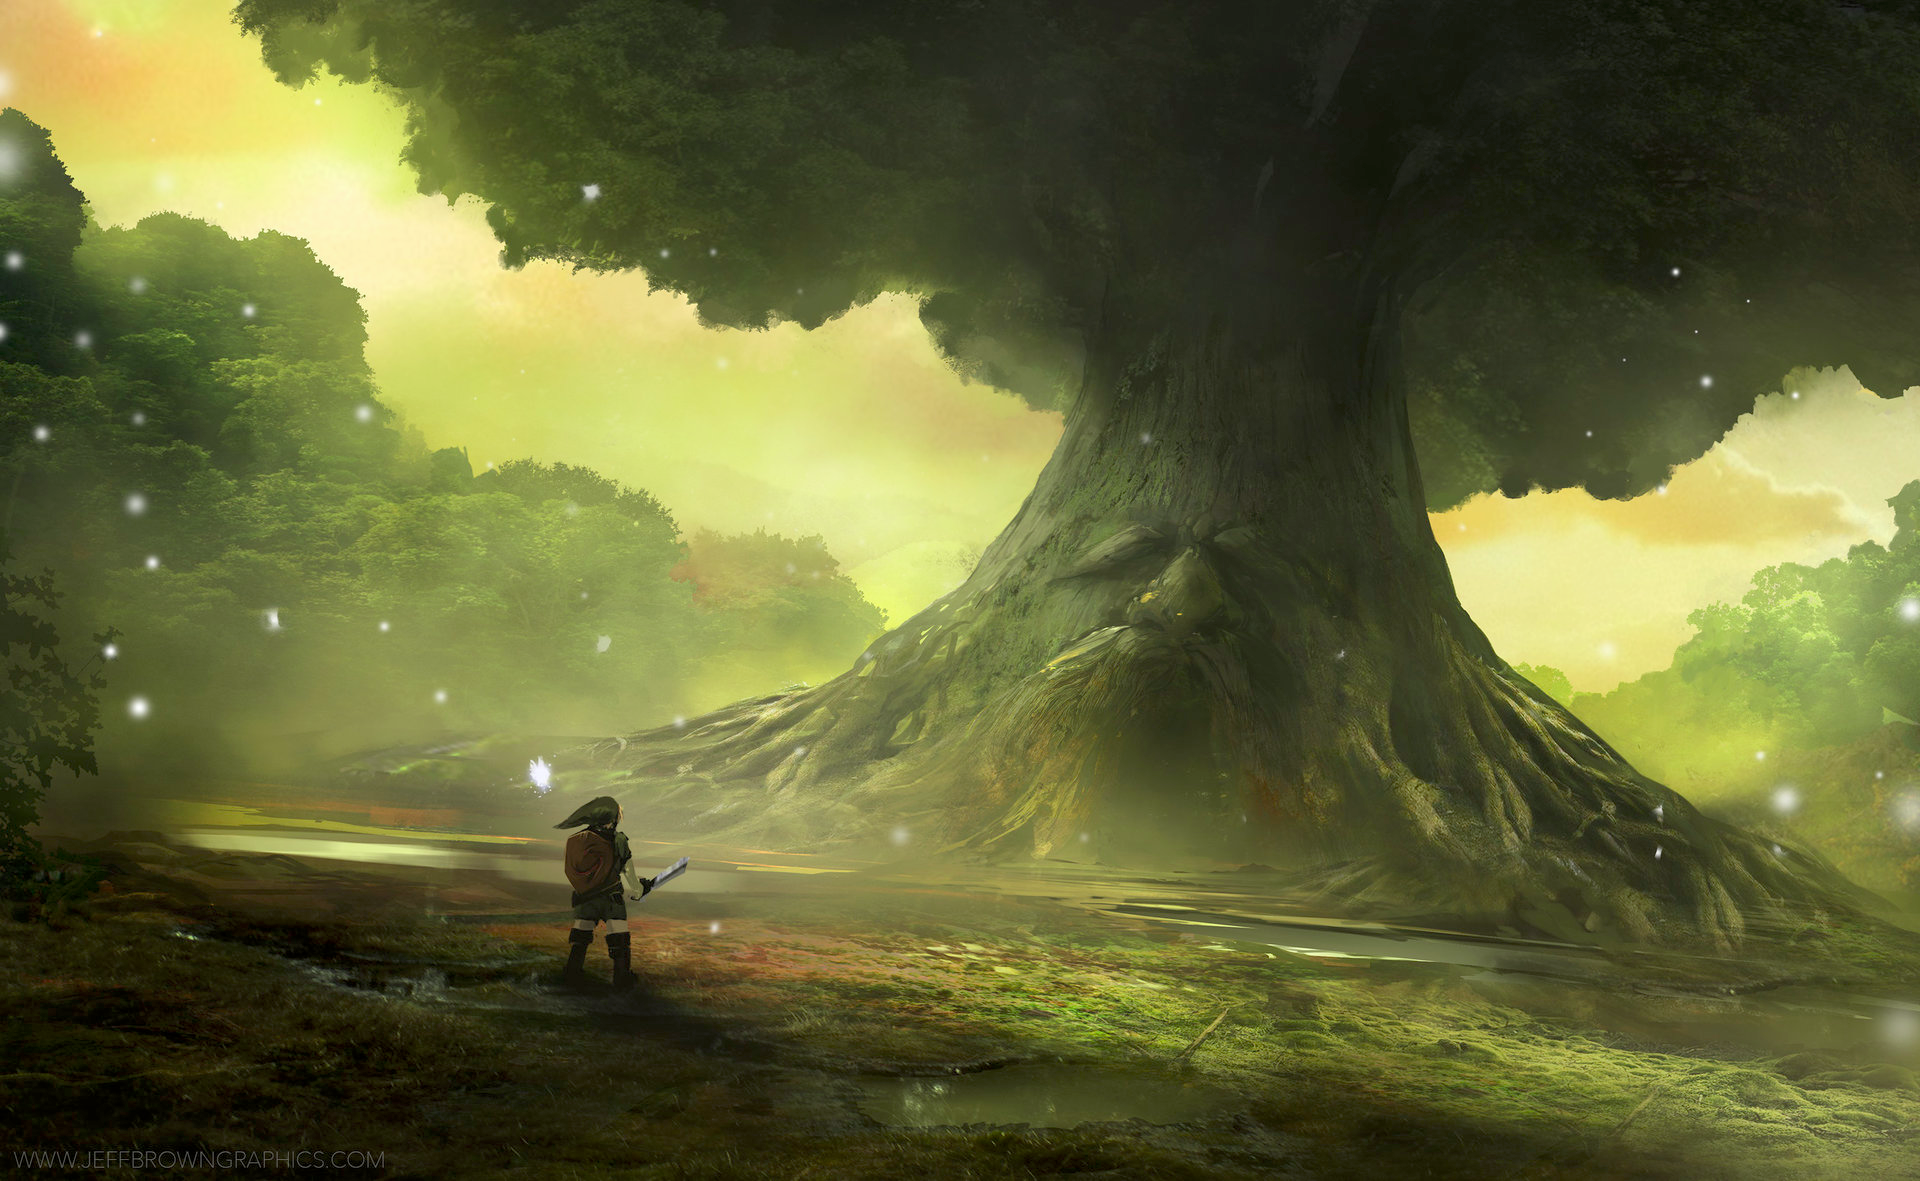

Now, let us try decision trees! Here is the code that train a decision tree with all the hyper-parameters that we have seen in class... and some more! We will try to improve the prediction by tuning the value of the hyper-parameters... with a random search!

But let us begin with the basics. We will use the rpart package. method = class -> classification. method = anova -> regression. We will perform a double split from all variables that minimizes the impurity of quality in the train classification set. 

We usually use caret in this subject because its abstraction level makes it very easy to change a ML algorithm without changing almost nothing more in the code. But for the decision trees we will use rpart because we will learn with this library how a random search over many different hyper-parameters can be done. With caret we are only able to change 1 decision tree hyper-parameter.   

Interpret the output and answer the questions of the form.

In [44]:
basic_tree <- rpart(
  quality_dic ~ .,
  data = train_classification,
  method = "class",
  maxdepth = 2
)
basic_tree

#la n es el nº de observaciones de las cuales 152 son malas. el nodo 2 tiene 860 observaciones y 52 son buenas. Cuando pone bad o good, hace referencia a la proporción mayoritaria. Lo que hay entre paréntesis es la proporción. 

n= 1120 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 1120 152 Bad (0.86428571 0.13571429)  
  2) alcohol< 11.15 860  52 Bad (0.93953488 0.06046512) *
  3) alcohol>=11.15 260 100 Bad (0.61538462 0.38461538)  
    6) citric.acid< 0.275 107  18 Bad (0.83177570 0.16822430) *
    7) citric.acid>=0.275 153  71 Good (0.46405229 0.53594771) *

In [51]:
#GINI del nodo 6

entropia<-1-0.8317757^2-0.16822430^2
entropia

gini_criterion(c(0.83177570,0.16822430))
entropy_criterion(c(0.83177570,0.16822430))

[1] 0.2798498

[1] 0.2798498

[1] 0.6536266

We are going to modify now several hyper-parameters: 

maxdepth, as in the previous exercise.

minbucket, smallest number of observations that are allowed in a terminal node.

minsplit, smallest number of observations in the parent node that could be split further.

cp, Complexity Parameter, related to pruning, minimum improvement in the model needed at each node.

Play a bit with the following code to see how trees change when you change the value of the hyper-parameters.

n= 1120 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 1120 152 Bad (0.86428571 0.13571429)  
    2) alcohol< 11.15 860  52 Bad (0.93953488 0.06046512)  
      4) volatile.acidity>=0.335 769  29 Bad (0.96228869 0.03771131) *
      5) volatile.acidity< 0.335 91  23 Bad (0.74725275 0.25274725)  
       10) alcohol< 10.65 69  11 Bad (0.84057971 0.15942029) *
       11) alcohol>=10.65 22  10 Good (0.45454545 0.54545455) *
    3) alcohol>=11.15 260 100 Bad (0.61538462 0.38461538)  
      6) citric.acid< 0.275 107  18 Bad (0.83177570 0.16822430)  
       12) sulphates< 0.615 57   2 Bad (0.96491228 0.03508772) *
       13) sulphates>=0.615 50  16 Bad (0.68000000 0.32000000)  
         26) density>=0.994275 29   4 Bad (0.86206897 0.13793103) *
         27) density< 0.994275 21   9 Good (0.42857143 0.57142857) *
      7) citric.acid>=0.275 153  71 Good (0.46405229 0.53594771)  
       14) fixed.acidity>=10.45 29   8 Bad (0.72413793 0.27586207) *
       15) fixed

quality_dic      .1      .2 .3 .4 .5 .6 .7          .8 ⋯    .1   .2
12  0.04        when alcohol >=       11 &  citric.acid <  ⋯ <  0.62   
4   0.04        when alcohol <  11                         ⋯           
26  0.14        when alcohol >=       11 &  citric.acid <  ⋯ >= 0.62   
10  0.16        when alcohol <  11                         ⋯           
14  0.28        when alcohol >=       11 &  citric.acid >= ⋯           
30  0.34        when alcohol >=       11 &  citric.acid >= ⋯           
124 0.35        when alcohol >=       11 &  citric.acid >= ⋯         & 
11  0.55        when alcohol is 11 to 11                   ⋯           
27  0.57        when alcohol >=       11 &  citric.acid <  ⋯ >= 0.62   
125 0.70        when alcohol >=       11 &  citric.acid >= ⋯         & 
63  0.82        when alcohol >=       11 &  citric.acid >= ⋯         & 
    .3             .4 .5  .6 .7      .8 .9  
12                                          
4                                           
26                        &  density >= 0.99
10                                          
14                                          
30                                          
124 residual.sugar <  2.4                   
11                                          
27                        &  density <  0.99
125 residual.sugar <  2.4                   
63  residual.sugar >= 2.4

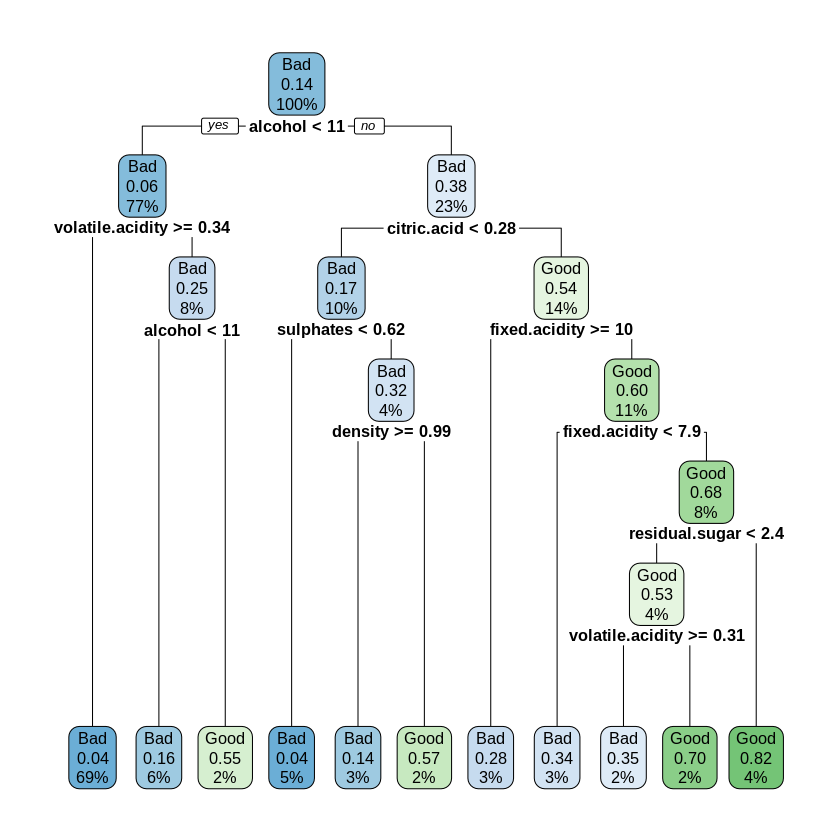

In [53]:
decision_tree <- rpart(
  quality_dic ~ .,
  data = train_classification,
  method = "class",
  maxdepth = 10,
  minsplit = 30,
  minbucket = 20,
  cp = 0.0001
)
print(decision_tree)
printcp(decision_tree)
summary(decision_tree)
rpart.plot(decision_tree)
rpart.rules(decision_tree)

Use the previous tree to predict the instances of the test set. Compute the accuracy using the confusion matrix.

In [66]:
tree_predictions <- predict(decision_tree, test_classification[,-length(test_classification)], type="class")
#INTRODUCE YOUR CODE HERE. 
confusionMatrix(data=tree_predictions,test_classification$quality_dic, positive="Good")

Confusion Matrix and Statistics

          Reference
Prediction Bad Good
      Bad  383   42
      Good  31   23
                                          
               Accuracy : 0.8476          
                 95% CI : (0.8122, 0.8786)
    No Information Rate : 0.8643          
    P-Value [Acc > NIR] : 0.8708          
                                          
                  Kappa : 0.3004          
                                          
 Mcnemar's Test P-Value : 0.2418          
                                          
            Sensitivity : 0.35385         
            Specificity : 0.92512         
         Pos Pred Value : 0.42593         
         Neg Pred Value : 0.90118         
             Prevalence : 0.13570         
         Detection Rate : 0.04802         
   Detection Prevalence : 0.11273         
      Balanced Accuracy : 0.63948         
                                          
       'Positive' Class : Good            
                           

You could do the same for regression as the following code snippet shows.

In [68]:
## INTRODUCE YOUR CODE HERE. Solution:
decision_tree <- rpart(
  quality ~ .,
  data = train_reg,
  method = "anova",
  maxdepth = 10,
  minsplit = 30,
  minbucket = 20,
  cp = 0.0001
)
tree_predictions <- predict(decision_tree, test_reg[,-length(test_reg)])

rmse_tree_predictions <- sqrt(sum((tree_predictions - test_reg[, length(test_reg)])**2))
rmse_tree_predictions

[1] 14.8863

Here you have the wonderful code of a random search to obtain the best tree. The for loop executes randomly samples several sets of hyper-parameter values and trains decision trees with them. Then, we measure the error commited by the decision tree with the accuracy of the test set that we have obtained before. We then store the accuracy and hyper-parameters if it is better than an accuracy obtained in a previous iteration. Answer the questions of the Google form regarding this code.  

In [71]:
set.seed(42)
# First, we initialize the hyper-parameters to a default value.
# This variables will store the best tree hyper-parameters after the
# random search. 
best_minsplit <- 0
best_minbucket <- 0
best_cp <- 0
best_maxdepth <- 0

# And we initialize the best accuracy to the worst possible accuracy value. This
# variable will store the best accuracy after the random search. 
best_acc <- 0
for(i in 1:50) {

        # We sample a random value for each of the 4 hyper-parameters.
        random_min_split <- sample(5:20, 1)
        random_min_bucket <- sample(3:10, 1)
        random_cp <- runif(min=0.01, max=0.1, n=1)
        random_max_depth <- sample(3:10, 1)

        # Then, we train a model with the sampled hyper-parameters.
        decision_tree <- rpart(
                quality_dic ~ .,
                data = train_classification,
                method = "class",
                maxdepth = random_max_depth,
                minsplit = random_min_split,
                minbucket = random_min_bucket,
                cp = random_cp
        )

        # Once the model has been trained, we estimate the generalization error
        # by computing the accuracy over the test set. 
        tree_predictions <- predict(decision_tree, test_classification[,-length(test_classification)], type="class")
        c_mat <- table(test_classification$quality_dic, tree_predictions)
        accuracy <- sum(diag(c_mat)) / sum(c_mat)

        # If the accuracy is better than the best seen accuracy, we update its
        # value and the value of the rest of hyper-parameters.
        if (accuracy > best_acc) {
                best_minsplit <- random_min_split
                best_minbucket <- random_min_bucket
                best_cp <- random_cp
                best_maxdepth <- random_max_depth
                best_acc <- accuracy
        }
}

# After all this code, INTRODUCE HERE THE CODE to just
# consult which is the best accuracy that you have
# retrieved.

best_acc

[1] 0.8643006

# ENSEMBLES (RANDOM FORESTS ARE JUST ENSEMBLES!).

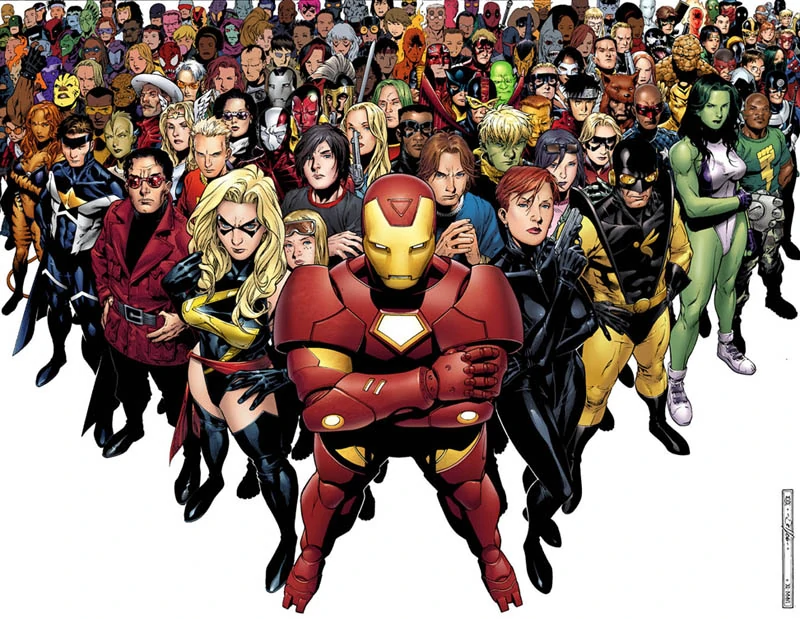

As we have studied in class, random forests are the favourite holiday location for data scientists!!! And something else... In particular, an easy to use model with great results in practice. Here is the code of a standard random forest with some hyper-parameters. You can improve the prediction by tuning the value of the hyper-parameters... or performing some grid and random search!

Here we will perform a grid search for the best value of the number of predictors for each split and tree hyper-parameter.

mtry: Number of variables randomly sampled as candidates at each split.

Answer the Google form questions regarding this code.

In [75]:
set.seed(42)
trControl <- trainControl(method = "repeatedcv",
    number = 10,
    search = "grid")

#Default value for number of predictors for each split and tree. (mtry)
mtry <- sqrt(ncol(train_classification)) #Suggested default.
tunegrid <- expand.grid(.mtry=mtry)
rf_default <- train(quality_dic~.,
    data = train_classification,
    method = "rf",
    metric = "Accuracy",
    trControl = trControl,
    tuneGrid = tunegrid,
    ntree = 1000) #Number of trees, default.
rf_default

Random Forest 

1120 samples
  11 predictor
   2 classes: 'Bad', 'Good' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 1009, 1008, 1008, 1007, 1008, 1009, ... 
Resampling results:

  Accuracy   Kappa    
  0.9008501  0.4907271

Tuning parameter 'mtry' was held constant at a value of 3.464102

Bagging and Boosting. What methodology works better?


In [78]:
set.seed(42)
#Training the bagging model with some hyper-parameters. Search in Google for the
#precise meaning of them.
bagging_model <- bagging(quality_dic~., data=train_classification, nbagg=50, method="double", coob=FALSE)
#El nbagg es el nº de estimadores, es decir, de clasificadores

#Performing a grid search of some boosting hyper-parameters included in the
#expand.grid method. 
grid <- expand.grid(n.trees = c(1000,1500), interaction.depth=c(1:3), shrinkage=c(0.01,0.05,0.1), n.minobsinnode=c(20))
ctrl <- trainControl(method = "cv", number = 5)
boosting_model <- train(quality_dic~.,data = train_classification, method = "gbm", trControl = ctrl, tuneGrid = grid)

#Let us see which methodology is the winner!
bag_predictions <- predict(bagging_model, test_classification[,-length(test_classification)], type="class")
c_mat <- table(test_classification$quality_dic, bag_predictions)
#INTRODUCE CODE HERE.

boost_predictions <- predict(boosting_model, test_classification[,-length(test_classification)])
c_mat <- table(test_classification$quality_dic, boost_predictions)
#INTRODUCE CODE HERE.
c_mat1
c_mat2

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        0.7934            -nan     0.0100    0.0014
     2        0.7906            -nan     0.0100    0.0014
     3        0.7875            -nan     0.0100    0.0013
     4        0.7846            -nan     0.0100    0.0015
     5        0.7819            -nan     0.0100    0.0014
     6        0.7791            -nan     0.0100    0.0013
     7        0.7763            -nan     0.0100    0.0013
     8        0.7740            -nan     0.0100    0.0012
     9        0.7713            -nan     0.0100    0.0012
    10        0.7691            -nan     0.0100    0.0009
    20        0.7462            -nan     0.0100    0.0010
    40        0.7106            -nan     0.0100    0.0006
    60        0.6833            -nan     0.0100    0.0005
    80        0.6595            -nan     0.0100    0.0005
   100        0.6388            -nan     0.0100    0.0004
   120        0.6232            -nan     0.0100    0.0003
   140        

      bag_predictions
       Bad Good
  Bad  395   19
  Good  31   34

      boost_predictions
       Bad Good
  Bad  379   35
  Good  23   42

**OPTIONAL** Best model and arguments of all the practice. Research and explore yourself how to do it!!!! Try to stack the models!!! Use more complex searches... Remember, the datathon is not so far... this could be a good chance to practice. 


In [80]:
## INTRODUCE CODE HERE (and thank you for reaching here :-)) 
acc<-sum(diag(c_mat))/sum(c_mat)
acc

[1] 0.8789144